# Load the Dataset

In [1]:
project_path = '/root/AI_Knowledge_Assistant'
data_path = project_path + '/data/raw'
splits_path = data_path + '/splits'
model_path = project_path + '/models'

In [2]:
import pandas as pd

raw_df = pd.read_csv(data_path + '/feedback_train.txt', sep='\t', engine='python', on_bad_lines='warn')

pd.set_option('display.max_colwidth', 1000)

/tmp/ipykernel_913901/1976554679.py:3: ParserWarning: Skipping line 3: Expected 6 fields in line 3, saw 7

  raw_df = pd.read_csv(data_path + '/feedback_train.txt', sep='\t', engine='python', on_bad_lines='warn')
/tmp/ipykernel_913901/1976554679.py:3: ParserWarning: Skipping line 7: Expected 6 fields in line 7, saw 7

  raw_df = pd.read_csv(data_path + '/feedback_train.txt', sep='\t', engine='python', on_bad_lines='warn')
/tmp/ipykernel_913901/1976554679.py:3: ParserWarning: Skipping line 11: Expected 6 fields in line 11, saw 7

  raw_df = pd.read_csv(data_path + '/feedback_train.txt', sep='\t', engine='python', on_bad_lines='warn')
/tmp/ipykernel_913901/1976554679.py:3: ParserWarning: Skipping line 15: Expected 6 fields in line 15, saw 7

  raw_df = pd.read_csv(data_path + '/feedback_train.txt', sep='\t', engine='python', on_bad_lines='warn')
/tmp/ipykernel_913901/1976554679.py:3: ParserWarning: Skipping line 19: Expected 6 fields in line 19, saw 7

  raw_df = pd.read_csv(data_path + 

In [3]:
raw_df

,id,source_platform,lang,feedback,category_level1,category_level2
0,1,Twitter,en,Can’t log in 😞 #OTP never arrives! What’s happening?,Technical,Login
1,3,Twitter,ar,لا أستطيع تسجيل الدخول، الكود لم يصل حتى الآن! #OTP,Technical,Login
2,4,Email,ar,أواجه مشكلة في تسجيل الدخول حيث لا يصل رمز المصادقة إلى هاتفي.,Technical,Login
3,5,Twitter,en,Can’t log in 😞 #OTP never arrives! What’s happening?,Technical,Login
4,7,Twitter,ar,لا أستطيع تسجيل الدخول، الكود لم يصل حتى الآن! #OTP,Technical,Login
...,...,...,...,...,...,...
407,446,Email,en,My claim was denied. How do I appeal this decision?,Claims,Appeal
408,447,Instagram,ar,هل تغطي وثيقتي الرعاية قبل الولادة؟,Claims,Coverage
409,448,Email,en,Can you clarify the maximum coverage limit under my policy?,Payment,Limit
410,449,Email,ar,أواجه مشكلة في تسجيل الدخول حيث لا يصل رمز المصادقة إلى هاتفي.,Technical,Login


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               412 non-null    int64 
 1   source_platform  412 non-null    object
 2   lang             412 non-null    object
 3   feedback         412 non-null    object
 4   category_level1  412 non-null    object
 5   category_level2  412 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.4+ KB


In [6]:
print("="*60)
print("DATA EXPLORATION")
print("="*60)

print(f"\nTotal samples: {len(raw_df)}")
print(f"\nLanguage distribution:")
print(raw_df['lang'].value_counts())
print(f"\nPlatform distribution:")
print(raw_df['source_platform'].value_counts())
print(f"\nCategory Level 1 distribution:")
print(raw_df['category_level1'].value_counts())
print(f"\nCategory Level 2 distribution:")
print(raw_df['category_level2'].value_counts())

DATA EXPLORATION

Total samples: 412

Language distribution:
lang
ar    221
en    191
Name: count, dtype: int64

Platform distribution:
source_platform
Twitter        130
Email          128
LinkedIn        86
Instagram       42
Google Maps     26
Name: count, dtype: int64

Category Level 1 distribution:
category_level1
Payment      162
Claims       158
Technical     92
Name: count, dtype: int64

Category Level 2 distribution:
category_level2
Installment        63
Appeal             56
App_Performance    54
Preexisting        53
Limit              52
Coverage           49
Refund             47
Login              38
Name: count, dtype: int64


**Check NaNs**

In [6]:
raw_df.isnull().sum()

id                 0
source_platform    0
lang               0
feedback           0
category_level1    0
category_level2    0
dtype: int64

**Check duplicates**

In [16]:
# show the duplicates in the feedback column
raw_df[raw_df.duplicated(subset=['feedback'])]

,id,source_platform,lang,feedback,category_level1,category_level2
3,5,Twitter,en,Can’t log in 😞 #OTP never arrives! What’s happening?,Technical,Login
4,7,Twitter,ar,لا أستطيع تسجيل الدخول، الكود لم يصل حتى الآن! #OTP,Technical,Login
5,8,Email,ar,أواجه مشكلة في تسجيل الدخول حيث لا يصل رمز المصادقة إلى هاتفي.,Technical,Login
6,9,Twitter,en,Can’t log in 😞 #OTP never arrives! What’s happening?,Technical,Login
7,11,Twitter,ar,لا أستطيع تسجيل الدخول، الكود لم يصل حتى الآن! #OTP,Technical,Login
...,...,...,...,...,...,...
407,446,Email,en,My claim was denied. How do I appeal this decision?,Claims,Appeal
408,447,Instagram,ar,هل تغطي وثيقتي الرعاية قبل الولادة؟,Claims,Coverage
409,448,Email,en,Can you clarify the maximum coverage limit under my policy?,Payment,Limit
410,449,Email,ar,أواجه مشكلة في تسجيل الدخول حيث لا يصل رمز المصادقة إلى هاتفي.,Technical,Login


**We will not drop the duplicates for this task**

In [17]:
unique_feedback_df = raw_df.drop_duplicates(subset=['feedback'])

In [18]:
unique_feedback_df

,id,source_platform,lang,feedback,category_level1,category_level2
0,1,Twitter,en,Can’t log in 😞 #OTP never arrives! What’s happening?,Technical,Login
1,3,Twitter,ar,لا أستطيع تسجيل الدخول، الكود لم يصل حتى الآن! #OTP,Technical,Login
2,4,Email,ar,أواجه مشكلة في تسجيل الدخول حيث لا يصل رمز المصادقة إلى هاتفي.,Technical,Login
28,39,Google Maps,en,App keeps crashing when I try to submit a claim – very frustrating. 😡,Technical,App_Performance
29,40,LinkedIn,en,The mobile app has serious performance issues during claim submission.,Technical,App_Performance
30,41,Google Maps,ar,التطبيق بطيء جدًا ويتوقف عند تحميل المستندات!,Technical,App_Performance
31,42,LinkedIn,ar,تطبيق الهاتف يعاني من مشاكل في الأداء عند إرسال المطالبات.,Technical,App_Performance
66,77,Twitter,en,Still waiting on my refund. It’s been weeks! #insurance,Payment,Refund
67,79,Twitter,ar,لم يتم استلام المبلغ المسترد بعد! #تأمين,Payment,Refund
68,80,Instagram,ar,تمت معالجة المبلغ المسترد في الوقت المحدد، شكرًا لكم,Payment,Refund


In [8]:
raw_df.sample(15)

,id,source_platform,lang,feedback,category_level1,category_level2
285,306,Email,ar,أرغب بمعرفة ما إذا كانت هناك خطة دفع للأقساط.,Payment,Installment
335,369,Email,ar,أرغب بمعرفة ما إذا كانت هناك خطة دفع للأقساط.,Payment,Installment
236,257,Email,ar,تم رفض المطالبة، كيف يمكنني تقديم استئناف؟,Claims,Appeal
354,388,LinkedIn,ar,لدي حالة مزمنة، كيف يؤثر ذلك على تغطيتي؟,Claims,Preexisting
218,239,Email,en,My claim was denied. How do I appeal this decision?,Claims,Appeal
152,173,LinkedIn,en,Do you offer monthly instalment plans for annual premiums?,Payment,Installment
142,163,LinkedIn,ar,هل تقدمون خطة أقساط شهرية لدفع الاشتراك السنوي؟,Payment,Installment
198,219,Twitter,en,I’m confused about what is covered under comprehensive insurance. 🤔,Claims,Coverage
319,351,Instagram,ar,هل تغطي وثيقتي الرعاية قبل الولادة؟,Claims,Coverage
321,354,Google Maps,ar,التطبيق بطيء جدًا ويتوقف عند تحميل المستندات!,Technical,App_Performance


**Check dataset balancing**

In [9]:
raw_df['category_level1'].value_counts()

category_level1
Payment      162
Claims       158
Technical     92
Name: count, dtype: int64

**Check unique classes in category_level1 and category_level2**

In [10]:
unique_cat1 = raw_df['category_level1'].unique()
unique_cat2 = raw_df['category_level2'].unique()

print("Unique values in 'category_level1':")
print(unique_cat1)

print("\nUnique values in 'category_level2':")
print(unique_cat2)

Unique values in 'category_level1':
['Technical' 'Payment' 'Claims']

Unique values in 'category_level2':
['Login' 'App_Performance' 'Refund' 'Limit' 'Installment' 'Coverage'
 'Appeal' 'Preexisting']


**Check dataset balancing**

In [11]:
print("\nCategory Level 1 counts:")
print(raw_df['category_level1'].value_counts())

print("\nCategory Level 2 counts:")
print(raw_df['category_level2'].value_counts())


Category Level 1 counts:
category_level1
Payment      162
Claims       158
Technical     92
Name: count, dtype: int64

Category Level 2 counts:
category_level2
Installment        63
Appeal             56
App_Performance    54
Preexisting        53
Limit              52
Coverage           49
Refund             47
Login              38
Name: count, dtype: int64


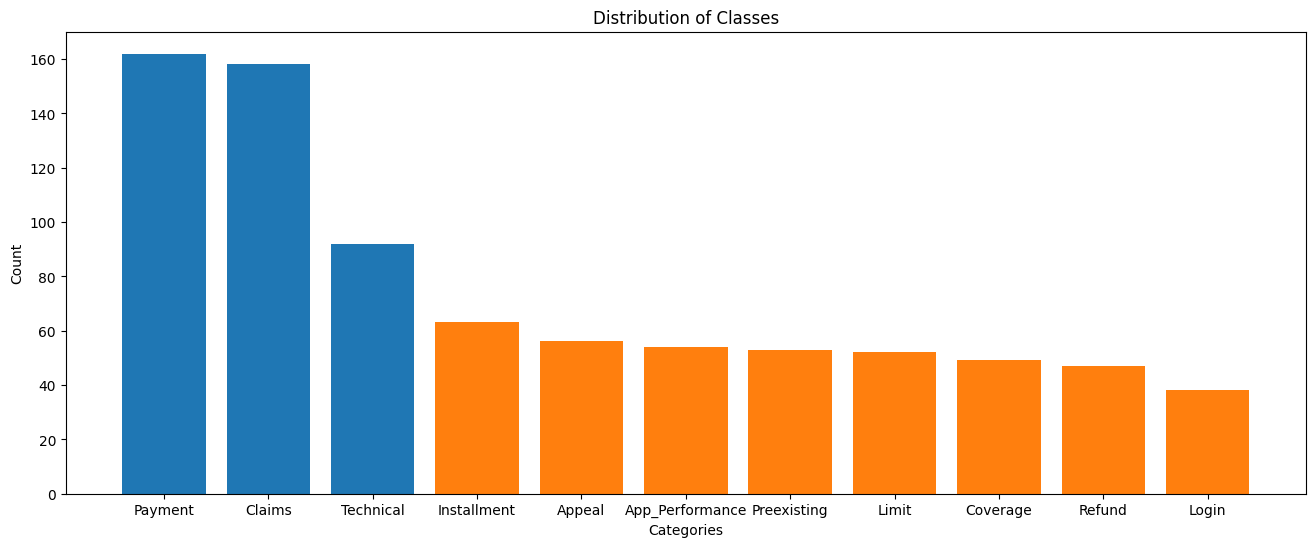

In [15]:
# make a visualization
import matplotlib.pyplot as plt

# Increase figure size to make the x axis longer
plt.figure(figsize=(16, 6))

# Create bar plot
plt.bar(raw_df['category_level1'].value_counts().index, raw_df['category_level1'].value_counts().values)
plt.bar(raw_df['category_level2'].value_counts().index, raw_df['category_level2'].value_counts().values)

# Add title and labels
plt.title('Distribution of Classes')
plt.xlabel('Categories')
plt.ylabel('Count')

# Show plot
plt.show()

# Data Augmentaion ??!!